In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from scripts.common.schemas import TypeCollectionCategory

tool = "pyreinfer"
task = TypeCollectionCategory.CALLABLE_RETURN

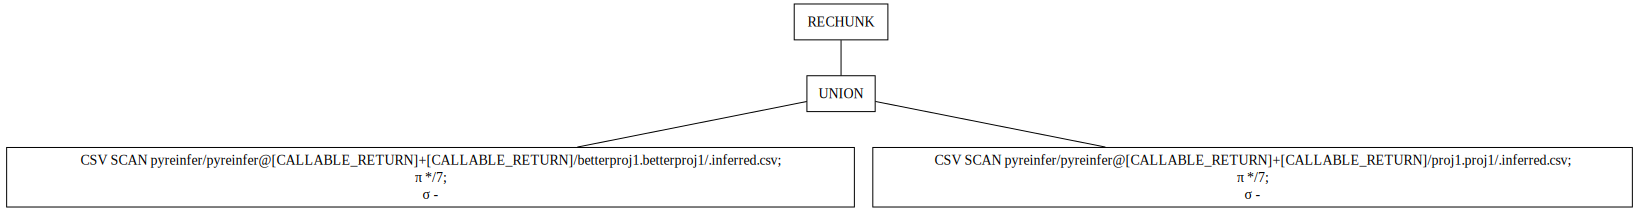

In [80]:
from experiments import api

task_folder = api.tasks.tool_and_task(tool=tool, task=task)
api.tasks.csv_graph(task_folder)

In [81]:
import functools, operator

import polars as pl

from experiments.api.config import ExperimentConfig
from experiments.api.mappers import MappingConfig
from experiments.api.filters import FilteringConfig

PyreQuery = ExperimentConfig(
    mapping=MappingConfig(
        dequalification=True,
        normalise_unions=True,
        normalise_typing_imports=True,
    ),
    filtering=FilteringConfig(),
)

mappers = PyreQuery.mapping.into_exprs()
filters = functools.reduce(operator.or_, PyreQuery.filtering.into_exprs())

queries = []

inferreds = list(task_folder.glob("./**/*.inferred.csv"))
for file in inferreds:
    queries.append(
        functools.reduce(
            lambda df, e: df.with_columns(e),
            mappers,
            pl.scan_csv(file),
        ).filter(predicate=filters)
    )

for inferred, df in zip(inferreds, pl.collect_all(queries, streaming=True)):
    print(inferred, df)
    api.tasks.dump_polars(df, tool=tool, task=task, author_proj=inferred.parent)


pyreinfer/pyreinfer@[CALLABLE_RETURN]+[CALLABLE_RETURN]/betterproj1.betterproj1/.inferred.csv shape: (6, 8)
┌──────────┬──────────────┬──────────────┬──────────────┬─────────────┬───────────┬──────┬─────────┐
│ file     ┆ category     ┆ qname        ┆ qname_ssa    ┆ anno        ┆ method    ┆ topn ┆ literal │
│ ---      ┆ ---          ┆ ---          ┆ ---          ┆ ---         ┆ ---       ┆ ---  ┆ ---     │
│ str      ┆ str          ┆ str          ┆ str          ┆ str         ┆ str       ┆ i64  ┆ null    │
╞══════════╪══════════════╪══════════════╪══════════════╪═════════════╪═══════════╪══════╪═════════╡
│ mod/x.py ┆ CALLABLE_RET ┆ function     ┆ function     ┆ int         ┆ pyreinfer ┆ 1    ┆ null    │
│          ┆ URN          ┆              ┆              ┆             ┆           ┆      ┆         │
│ mod/x.py ┆ CALLABLE_RET ┆ function_wit ┆ function_wit ┆ int         ┆ pyreinfer ┆ 1    ┆ null    │
│          ┆ URN          ┆ h_multiline_ ┆ h_multiline_ ┆             ┆           ┆ 

Cannot combine 'streaming' with 'common_subplan_elimination'. CSE will be turned off.
Cannot combine 'streaming' with 'common_subplan_elimination'. CSE will be turned off.


AssertionError: Preventing overwrite of already existing dataset: pyreinfer/CALLABLE_RETURN/pyreinfer/pyreinfer@[CALLABLE_RETURN]+[CALLABLE_RETURN]/betterproj1.betterproj1.csv